In [ ]:
!nvidia-smi

Fri Jan  9 23:40:45 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/YOLO

/content/drive/MyDrive/YOLO


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.250 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.5/112.6 GB disk)


In [ ]:


!unzip -q /content/drive/MyDrive/YOLO/"Plants Diseases Detection and Classification.v12i.yolov8-obb.zip" -d /content/dataset

!ls /content/dataset

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
import yaml

class_names = [
    'Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf',
    'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot',
    'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf',
    'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf',
    'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf',
    'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf',
    'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus',
    'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf',
    'grape leaf', 'grape leaf black rot'
]

data_config = {
    'path': '/content/dataset',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': 29,
    'names': class_names
}

with open('/content/dataset/data.yaml', 'w') as f:
    yaml.dump(data_config, f)

print("data.yaml updated with absolute paths!")

data.yaml updated with absolute paths!


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8s.pt')

!yolo task=detect mode=train \
    model=yolov8s.pt \
    data='/content/dataset/data.yaml' \
    epochs=50 \
    imgsz=640 \
    plots=True \
    name=agribot_model

Ultralytics 8.3.250 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=agribot_model4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

In [ ]:
!ls runs/detect/agribot_model4

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch5080.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch5081.jpg  weights
labels.jpg			 train_batch5082.jpg


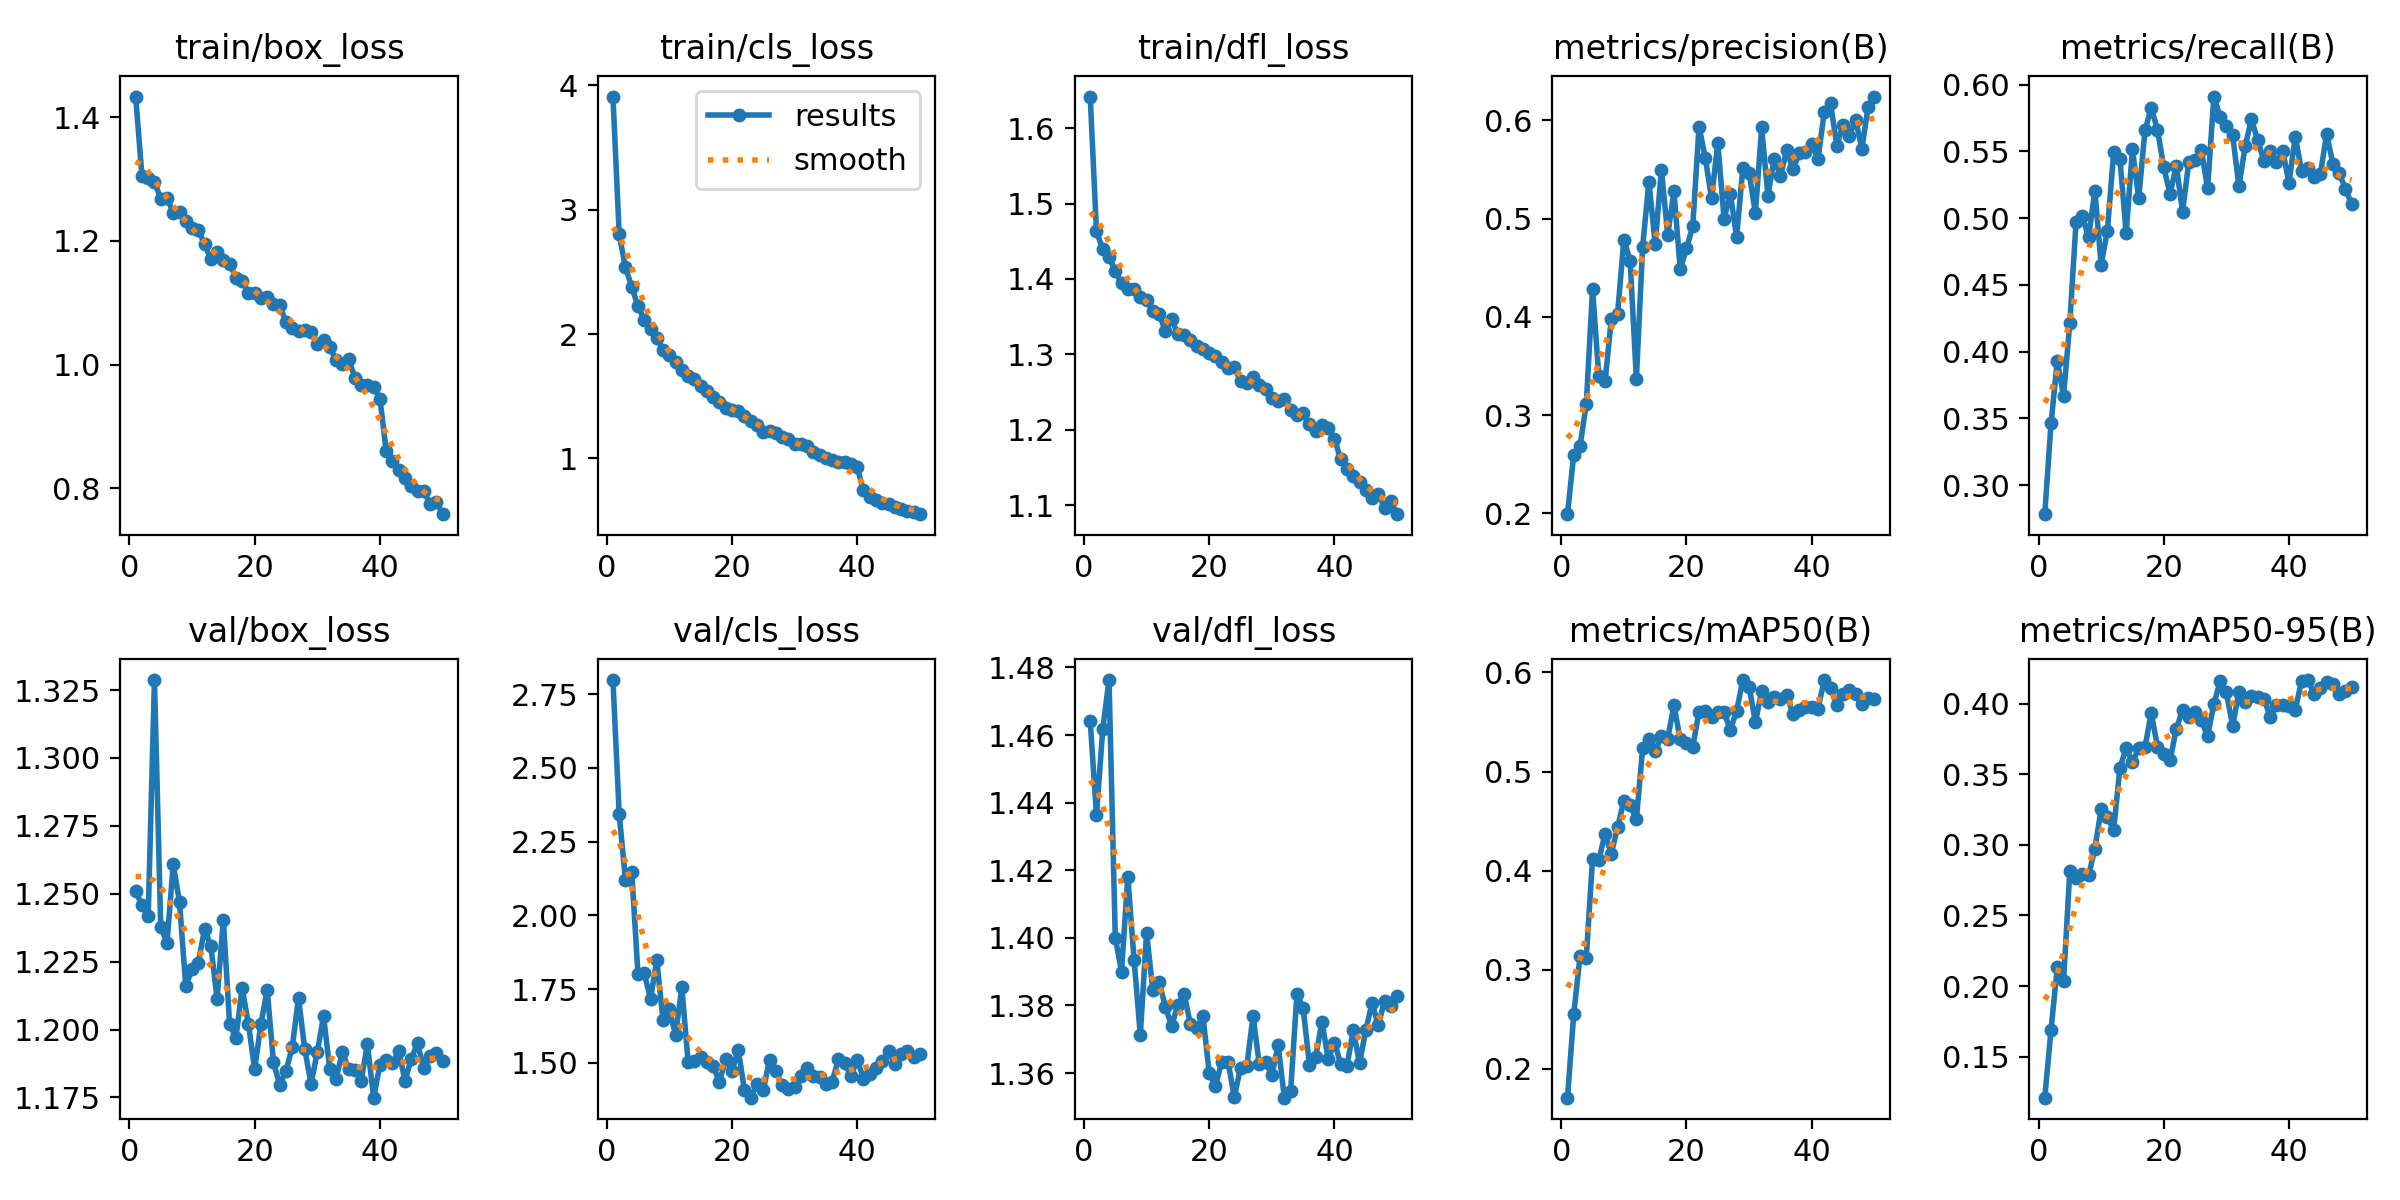

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/YOLO/runs/detect/agribot_model4/results.png'
Image(filename=image_path, width=600)

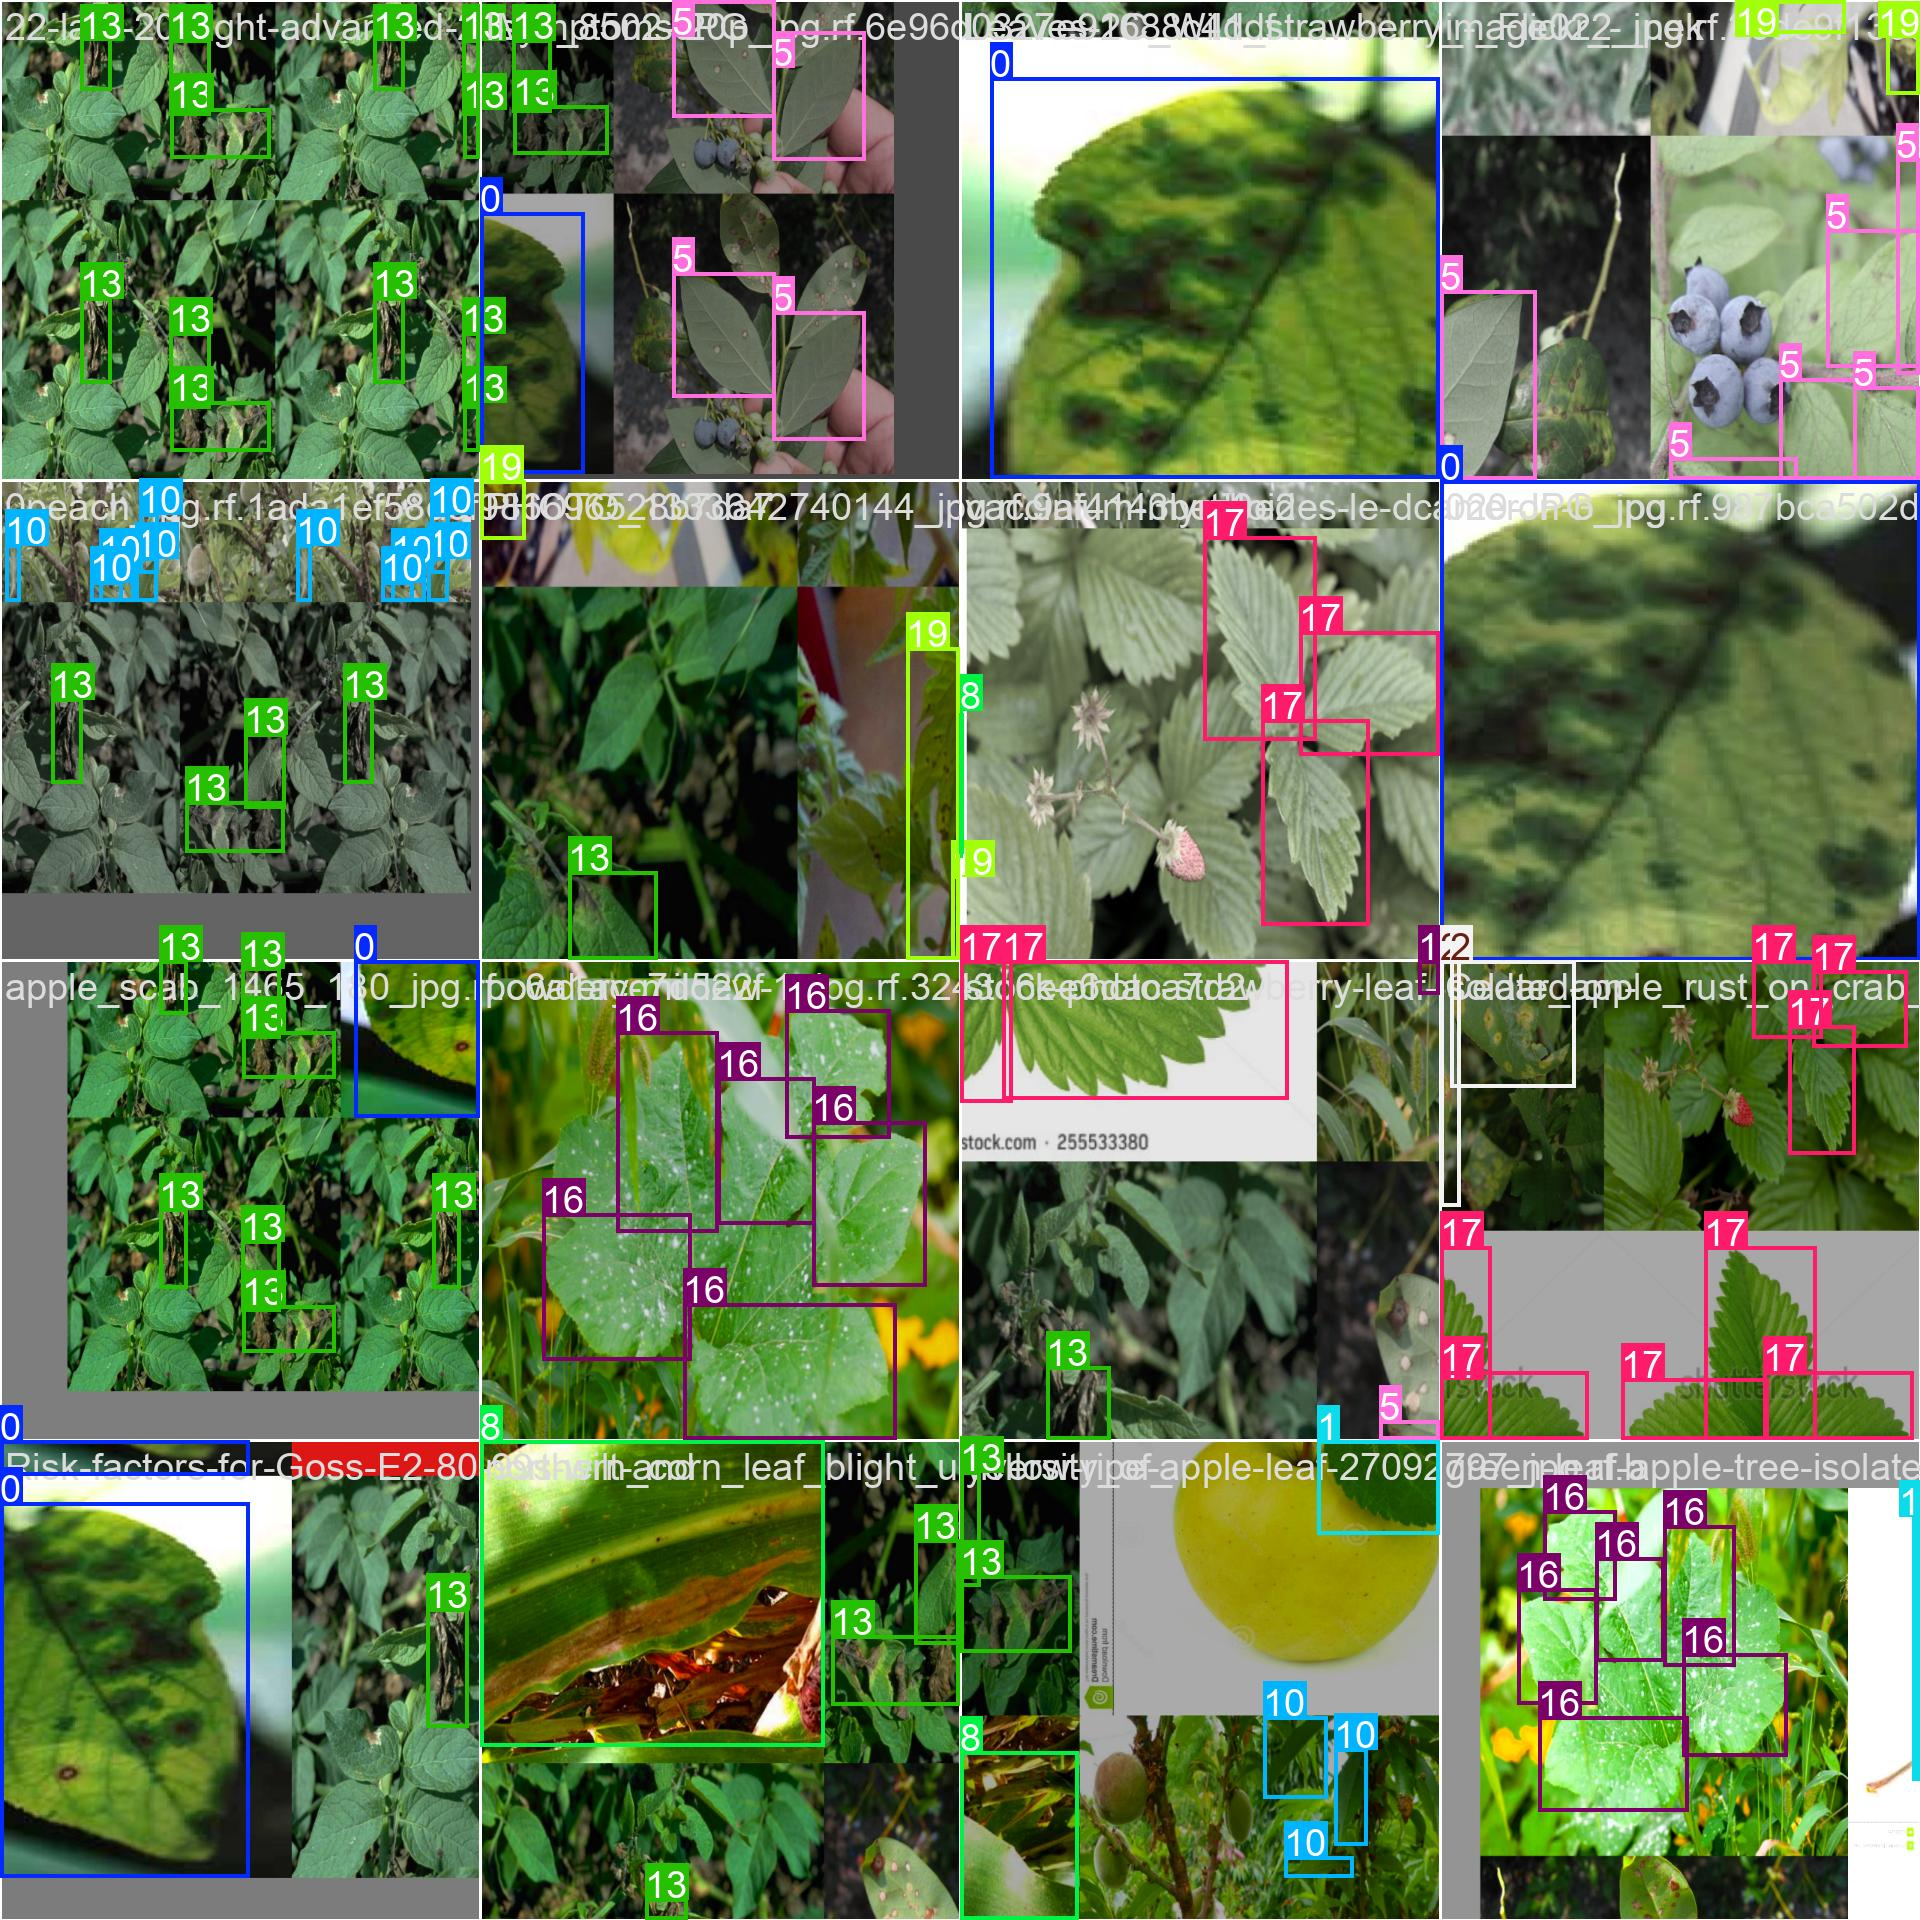

In [ ]:
image_path = '/content/drive/MyDrive/YOLO/runs/detect/agribot_model4/train_batch0.jpg'
Image(filename=image_path, width =600)

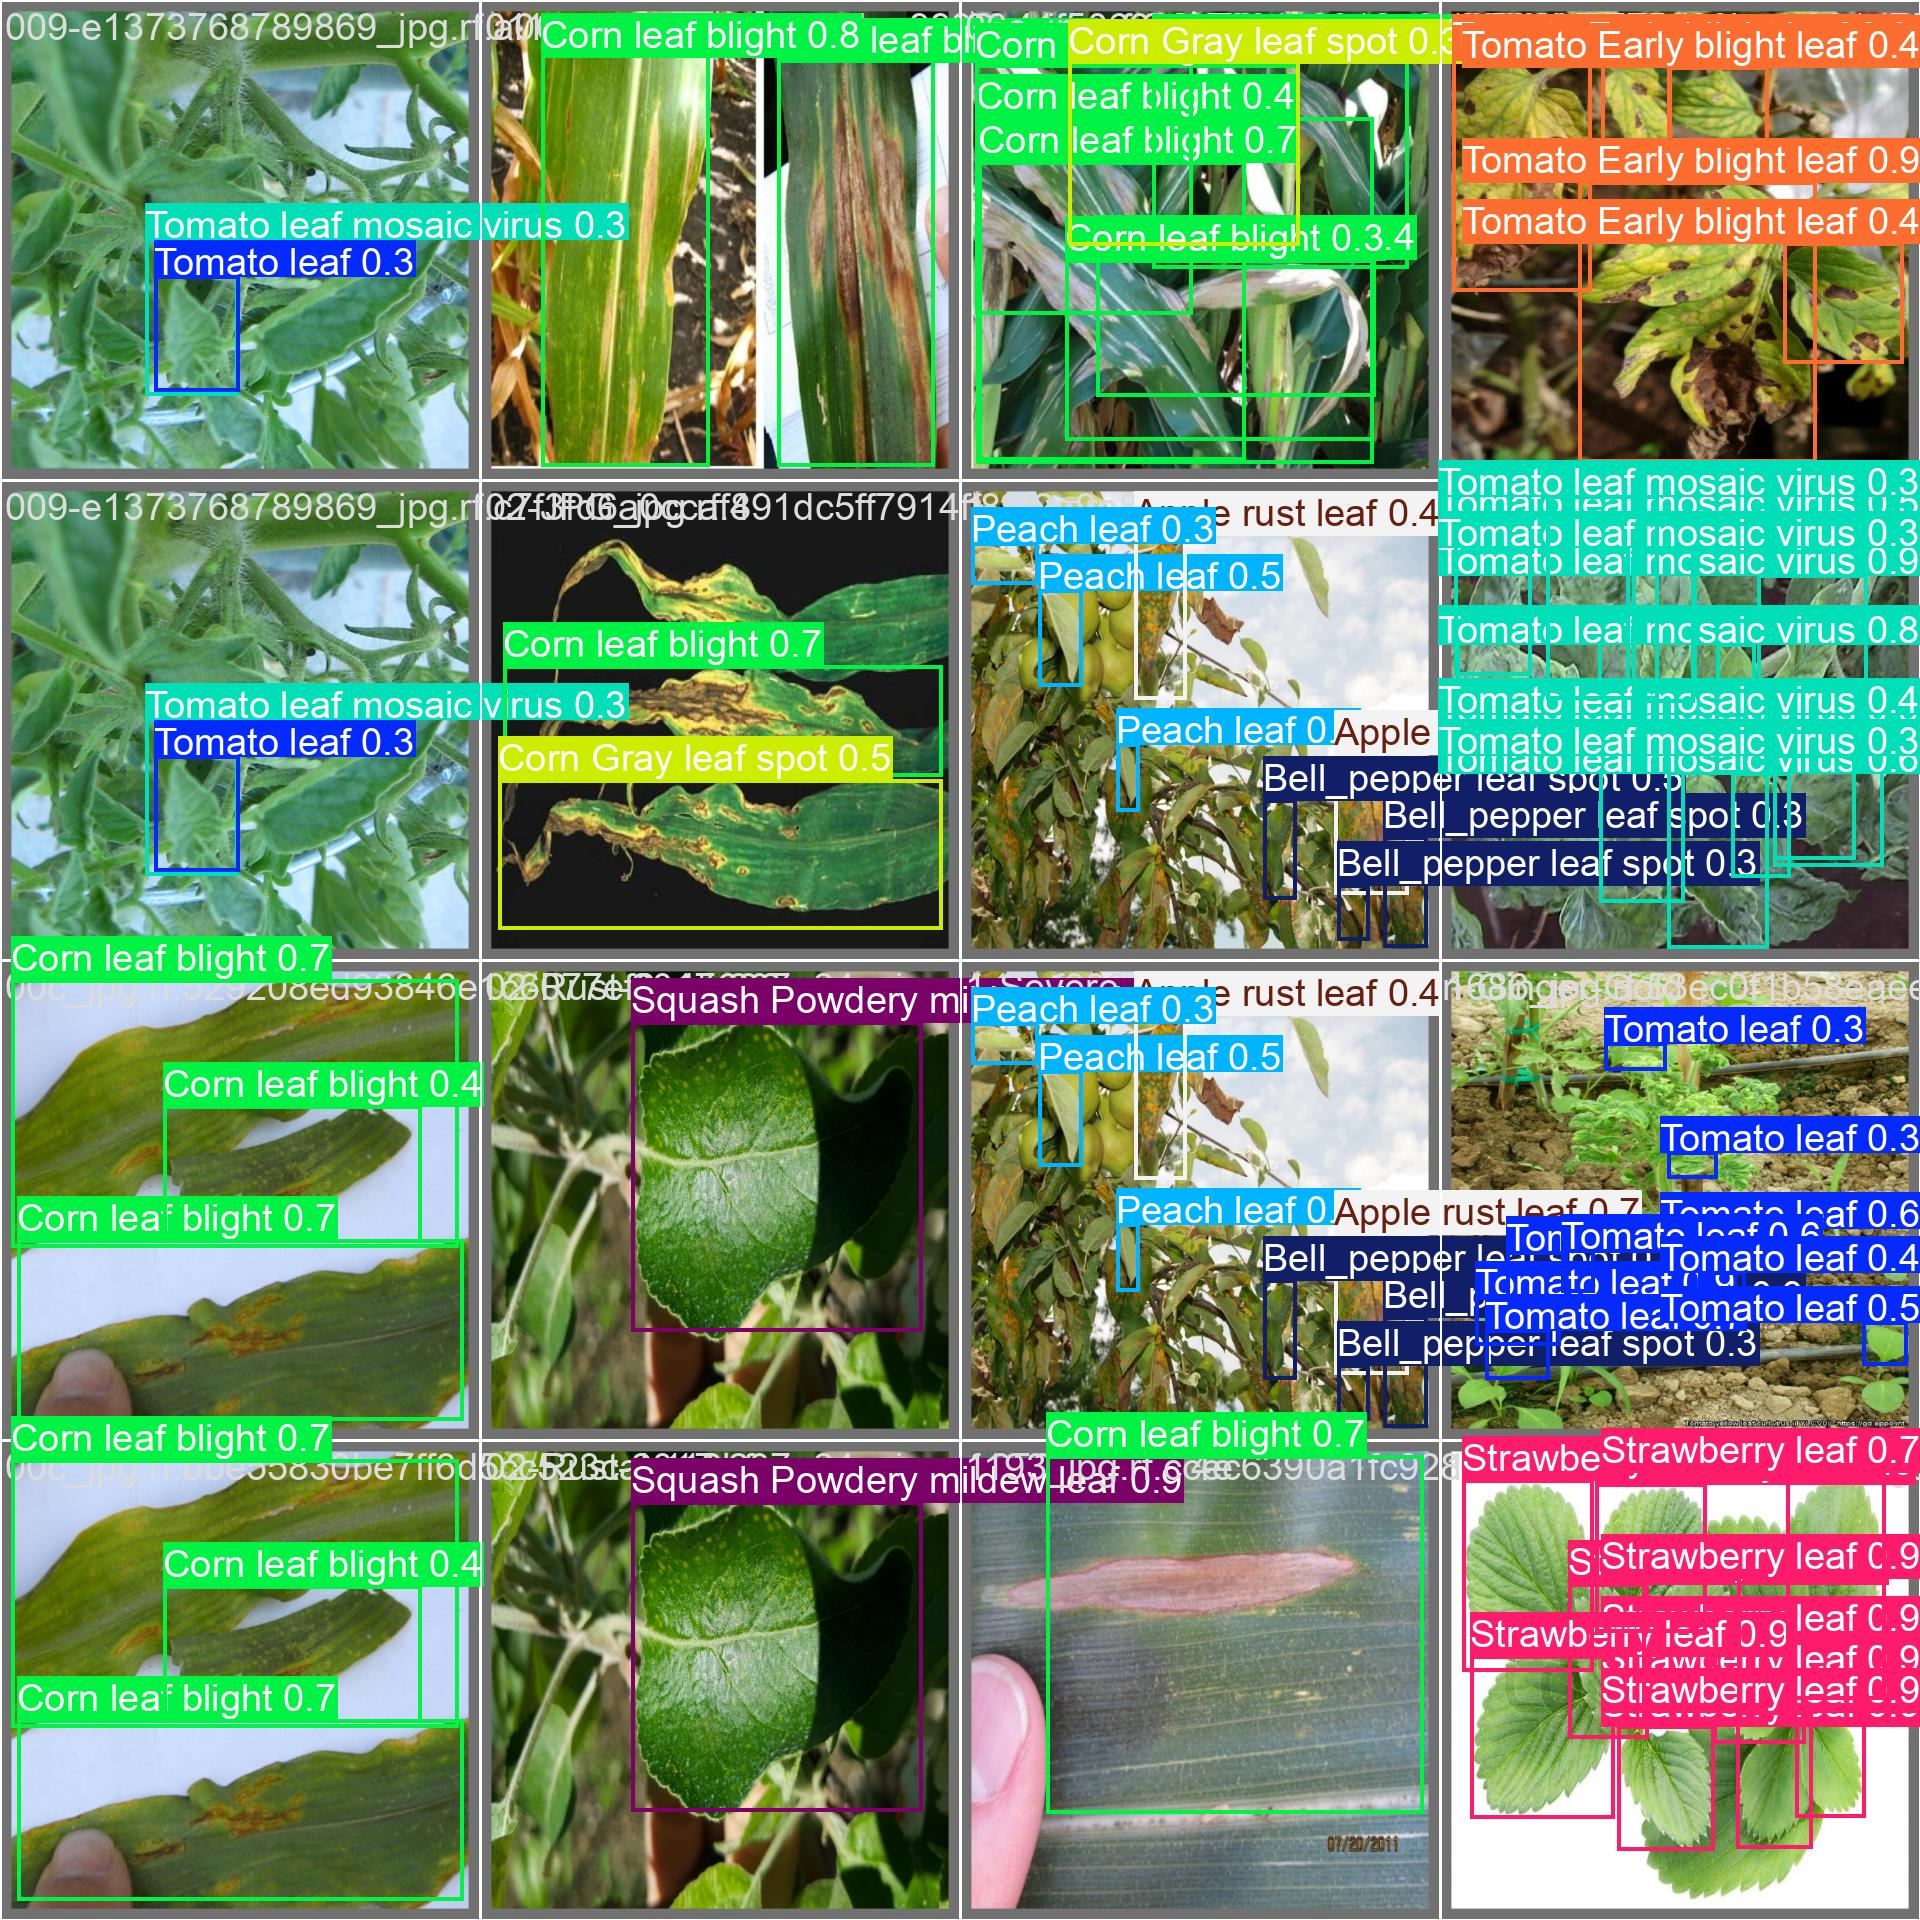

In [ ]:
Image(filename='/content/drive/MyDrive/YOLO/runs/detect/agribot_model4/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model="/content/drive/MyDrive/YOLO/runs/detect/agribot_model4/weights/best.pt" data=/content/dataset/data.yaml

Ultralytics 8.3.250 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,136,807 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2518.2±901.4 MB/s, size: 77.2 KB)
val: Scanning /content/dataset/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 250/250 4.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 2.8it/s 5.6s
                   all        250        884      0.617      0.538      0.585      0.417
       Apple Scab Leaf          6         14      0.749      0.357      0.541      0.376
            Apple leaf          9         23      0.837      0.894      0.932      0.672
       Apple rust leaf         11         39      0.737       0.43      0.555      0.342
 Bell_pepper leaf spot          3         11      0.545      0.455      0.504      0.374
        Blueberry leaf         13        140    

Inference on Test images

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/YOLO/runs/detect/agribot_model4/weights/best.pt" conf=0.25 source="/content/dataset/test/images" save=True


Ultralytics 8.3.250 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,136,807 parameters, 0 gradients, 28.5 GFLOPs

image 1/249 /content/dataset/test/images/022_jpg.rf.db03fecdb4b0082ef982753c6efe4528.jpg: 640x640 1 Corn Gray leaf spot, 16.4ms
image 2/249 /content/dataset/test/images/02b13cea19417b15cf3d6ff534aa7ea653ad783094a60_1260x1260_jpg.rf.055178f22c00759d02da4055a7b271a5.jpg: 640x640 1 Cherry leaf, 16.3ms
image 3/249 /content/dataset/test/images/02b13cea19417b15cf3d6ff534aa7ea653ad783094a60_1260x1260_jpg.rf.3fda403c1782e3c892bb9d90c79442b5.jpg: 640x640 1 Cherry leaf, 16.3ms
image 4/249 /content/dataset/test/images/052609-20Hartman-20Crabapple-20scab-20single-20leaf-JPG_jpg.rf.b85e9ec8724be4fcd52c13004ed751c5.jpg: 640x640 1 Apple Scab Leaf, 16.3ms
image 5/249 /content/dataset/test/images/07c_jpg.rf.96aaa440e570d7dba158419a294f44da.jpg: 640x640 1 Corn Gray leaf spot, 1 Corn leaf blight, 16.2ms
image 6/249 /content/dataset/test/imag

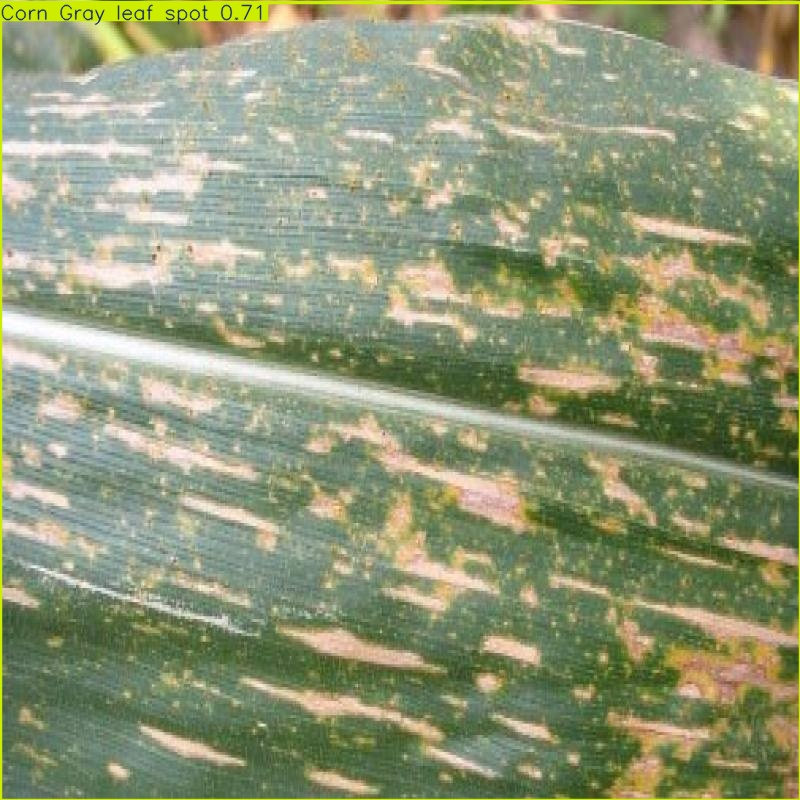

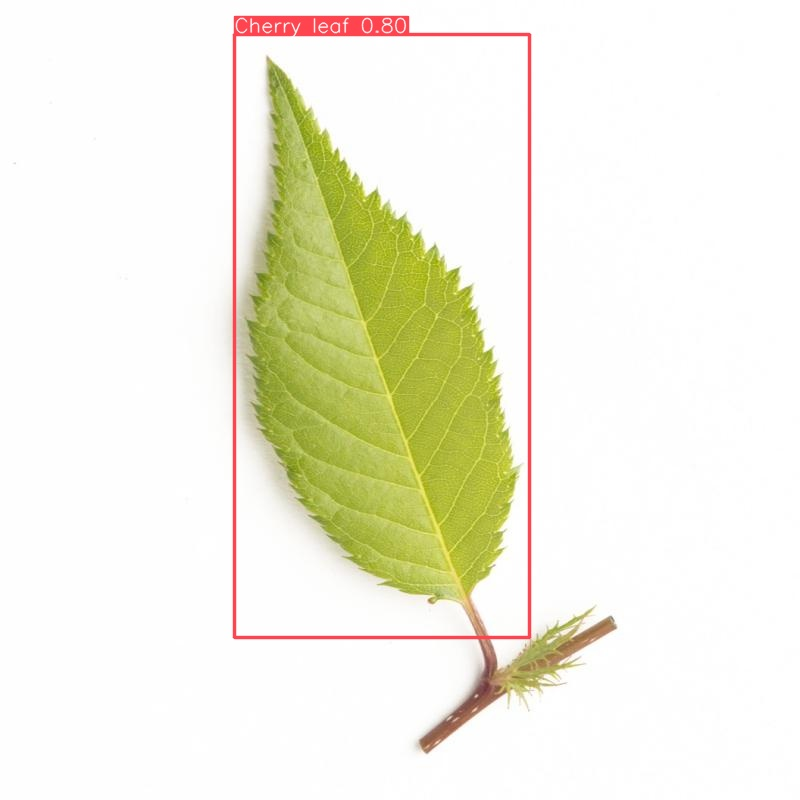

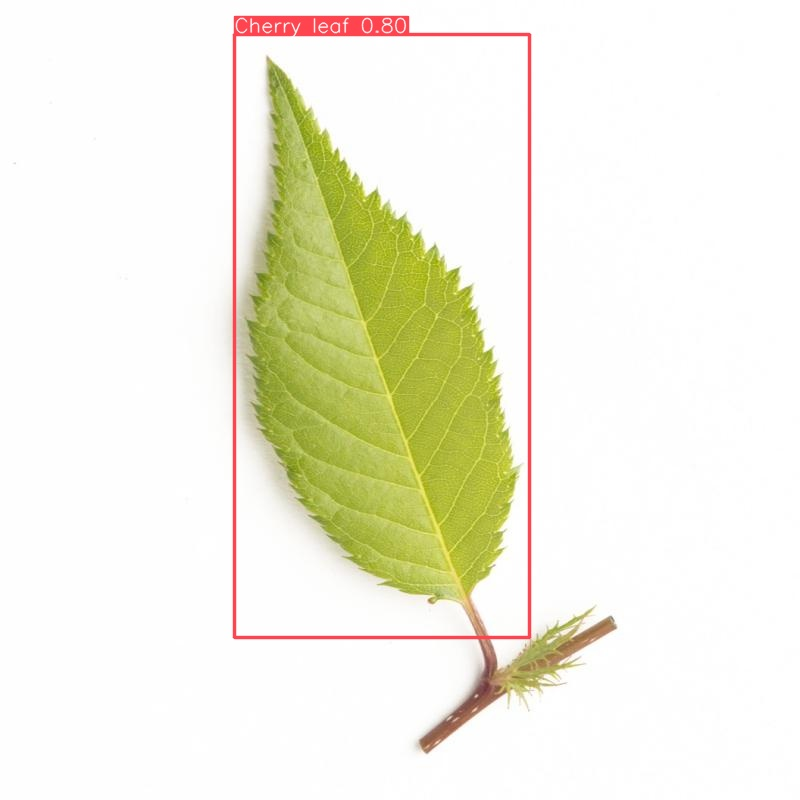

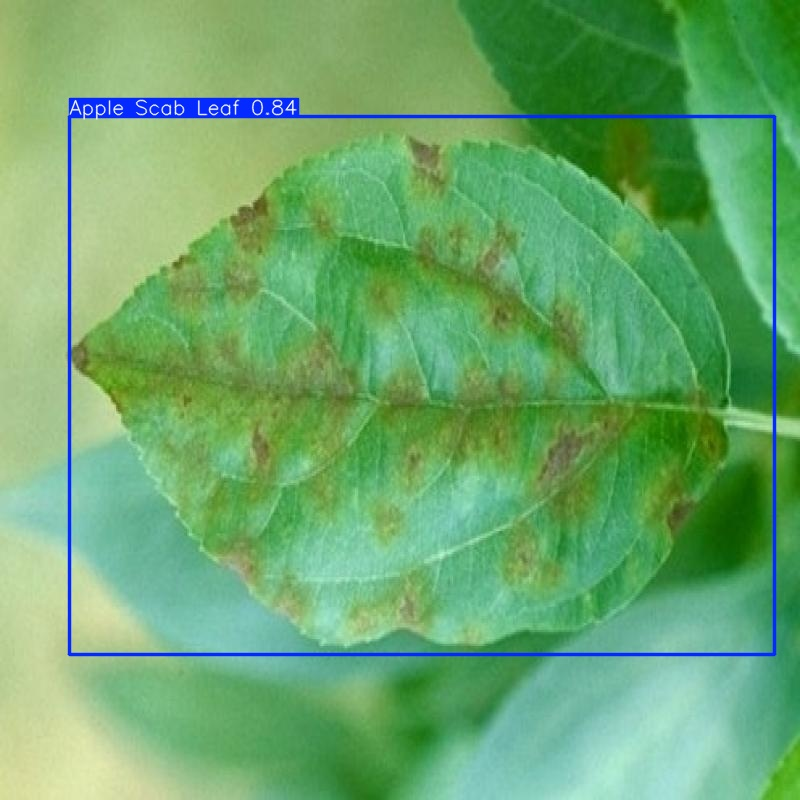

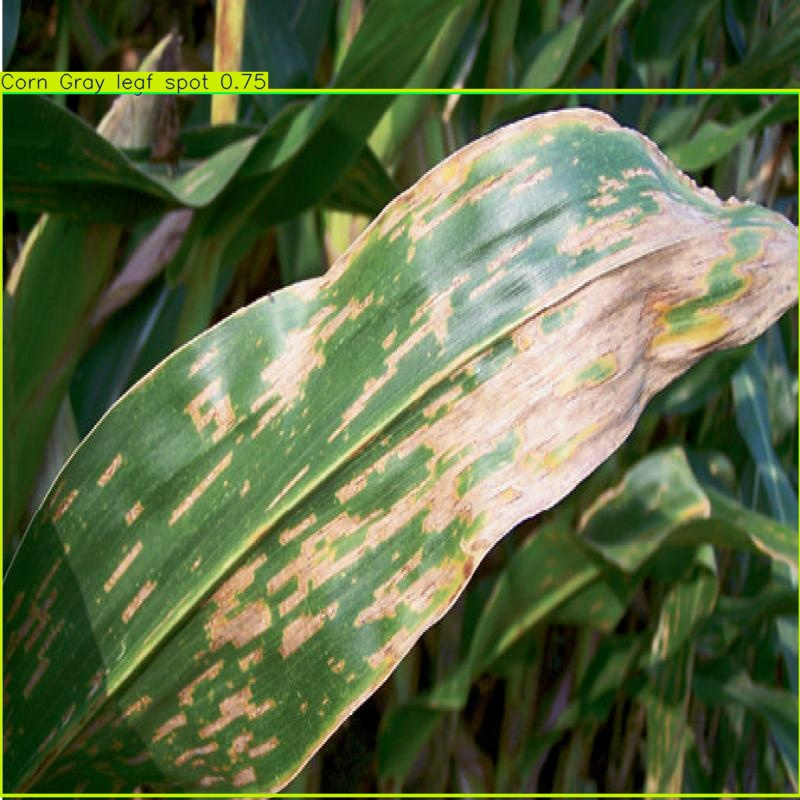

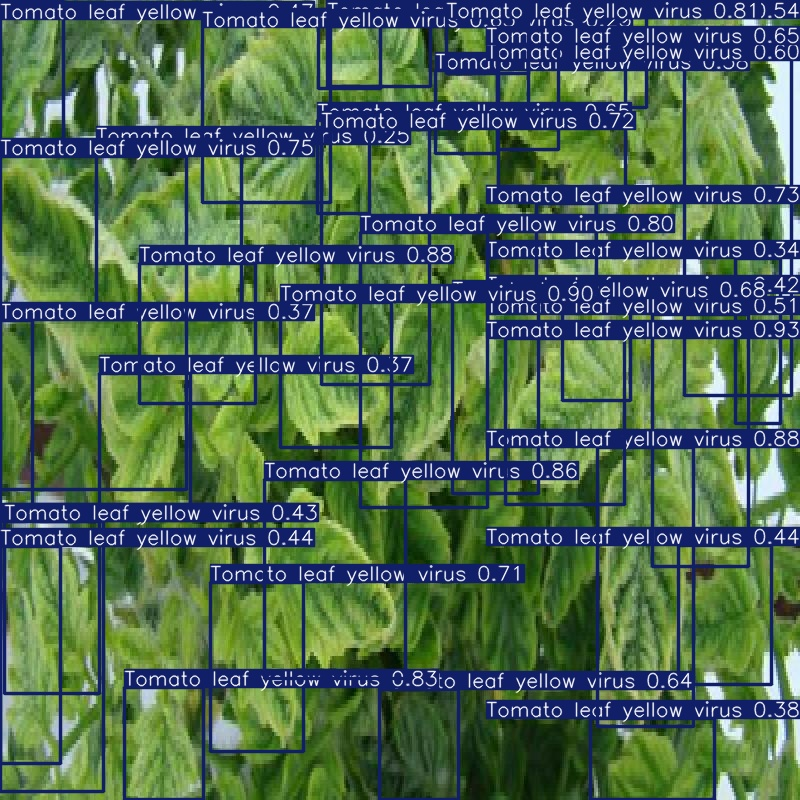

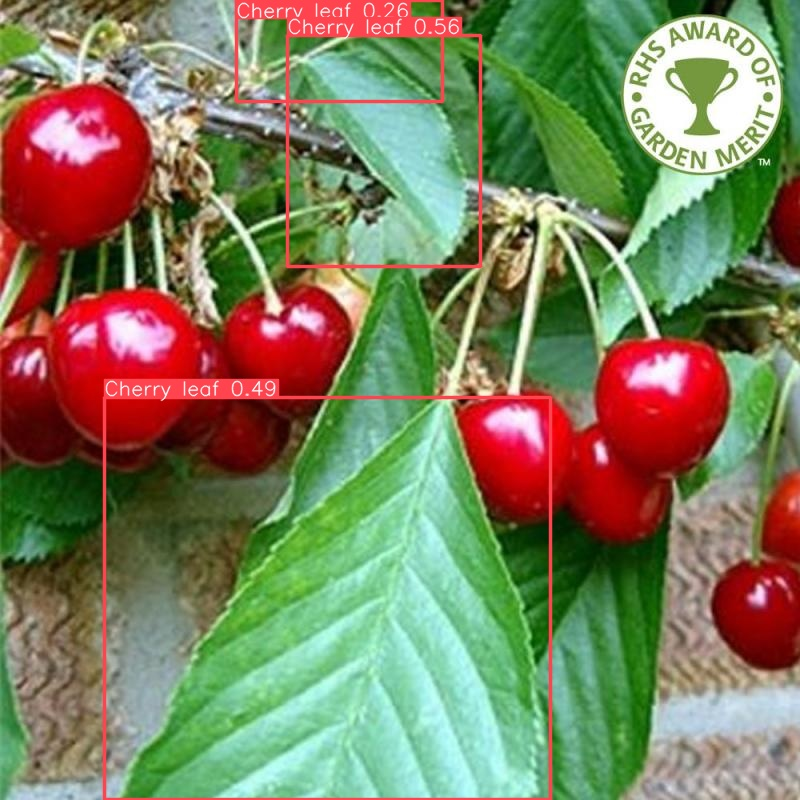

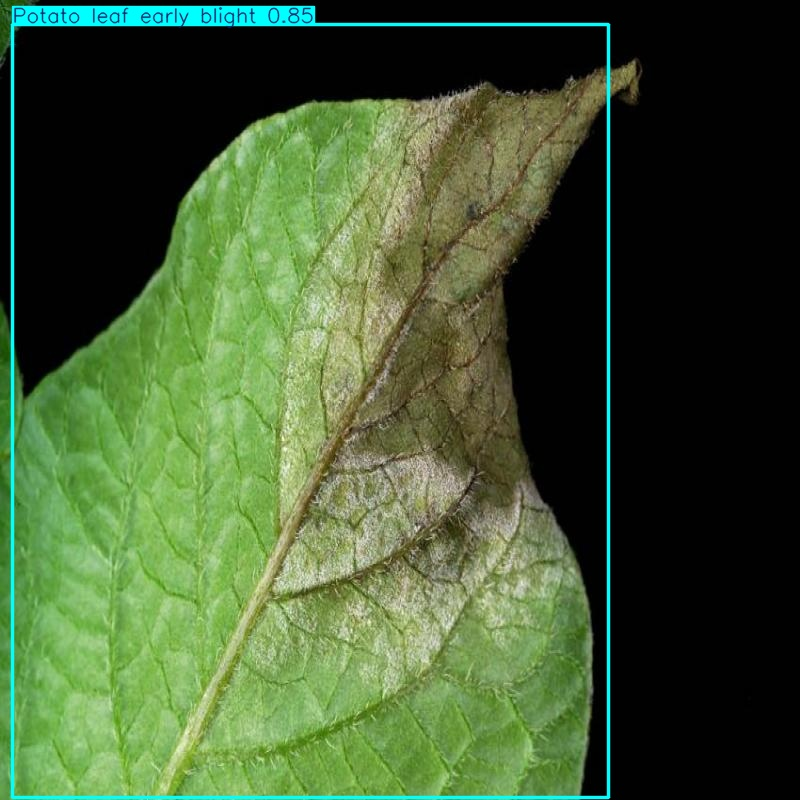

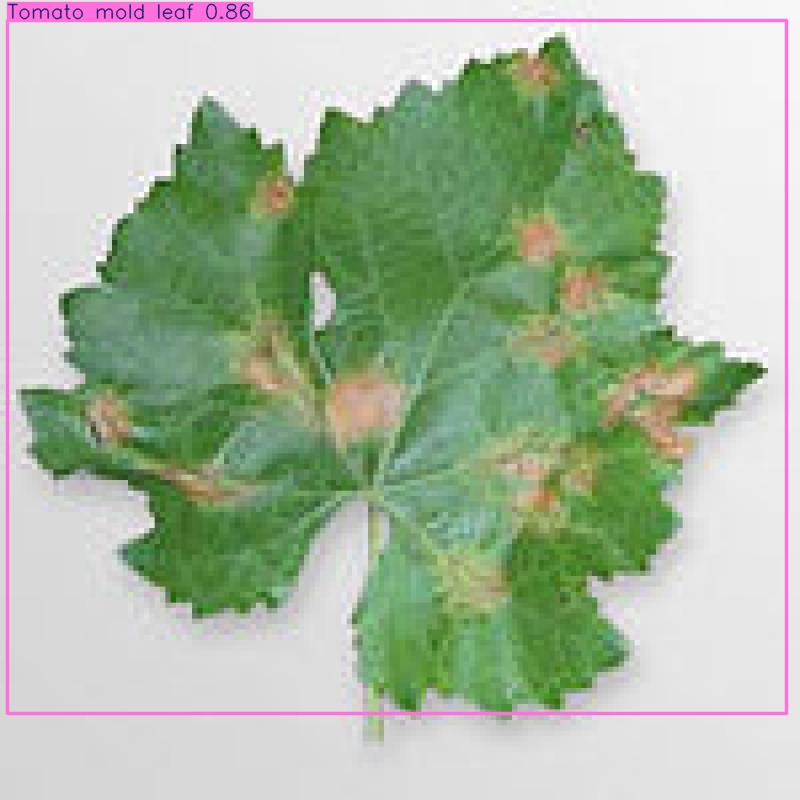

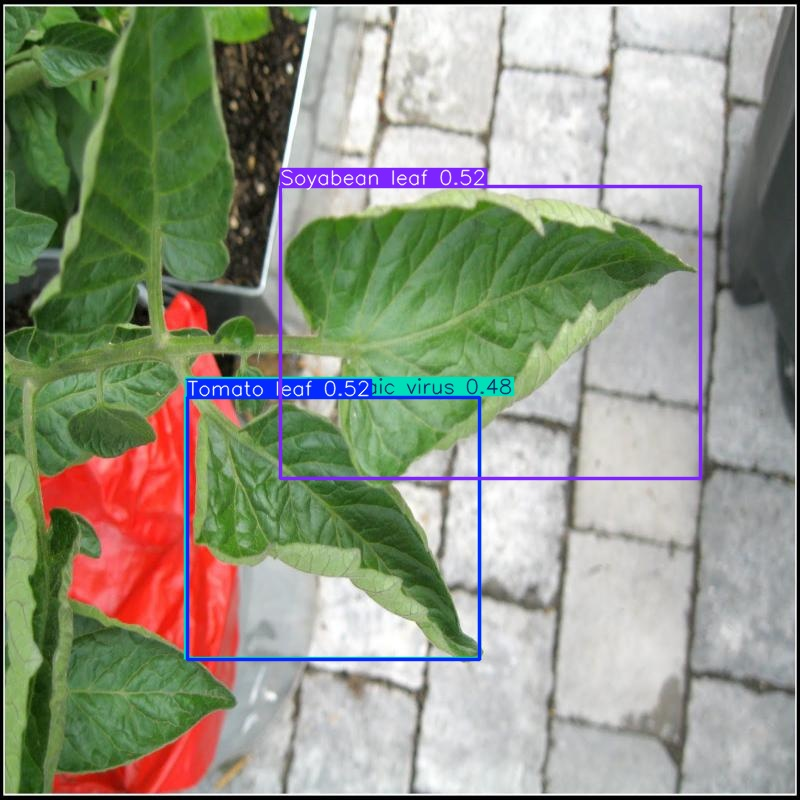

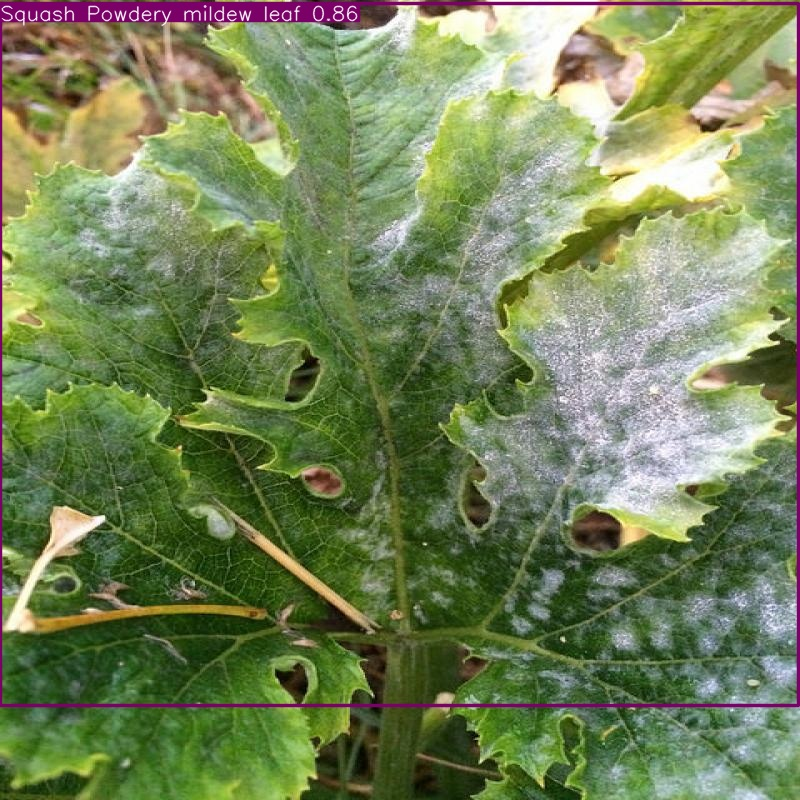

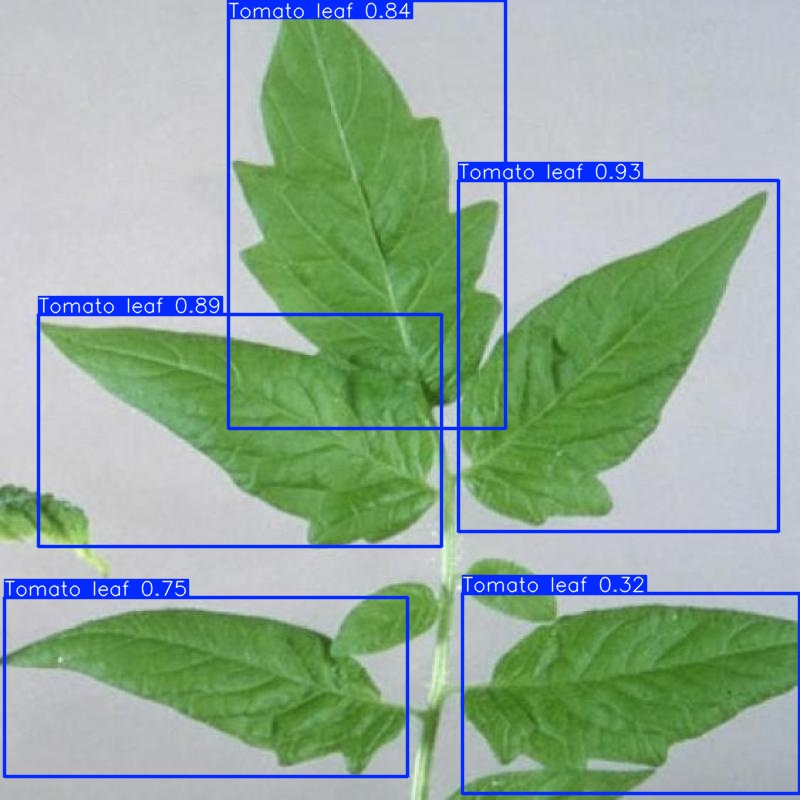

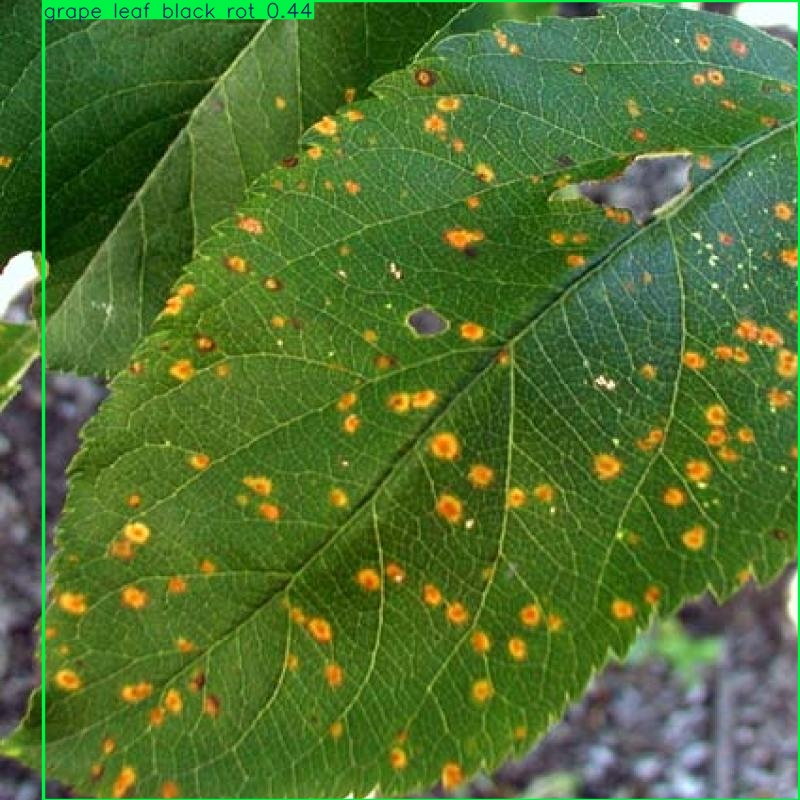

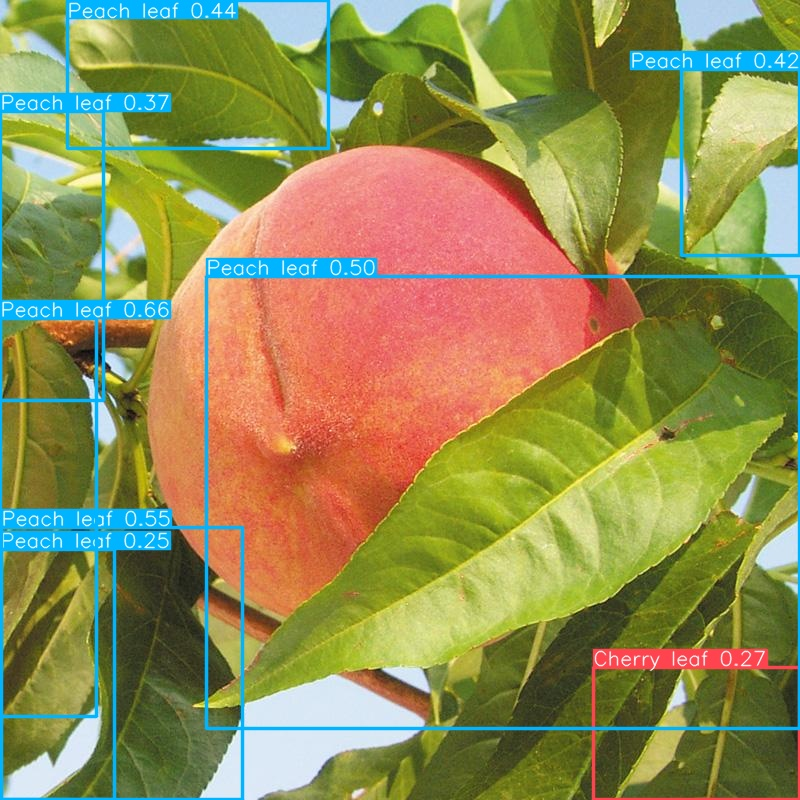

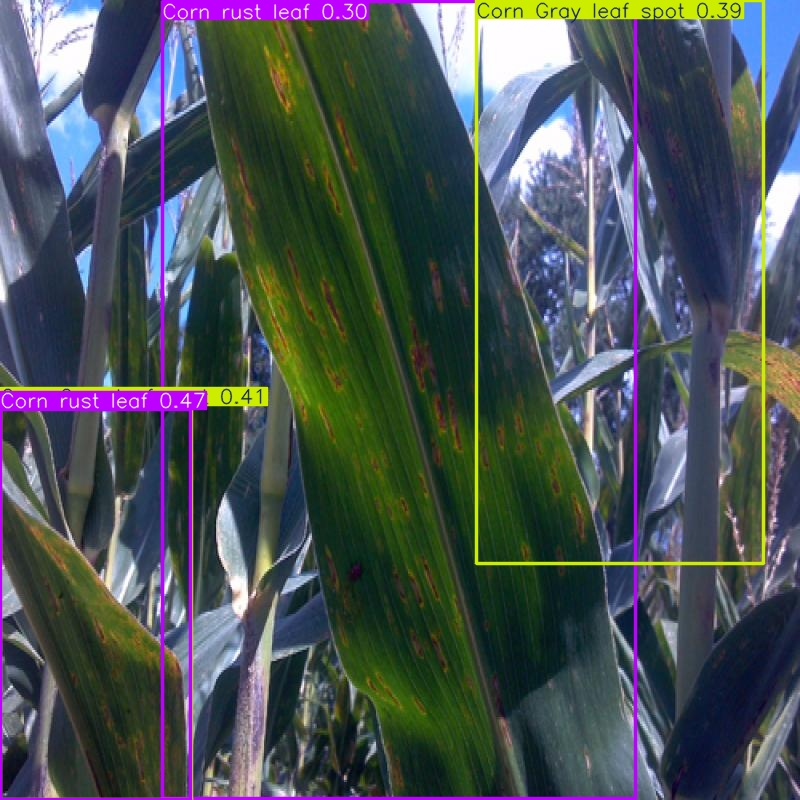

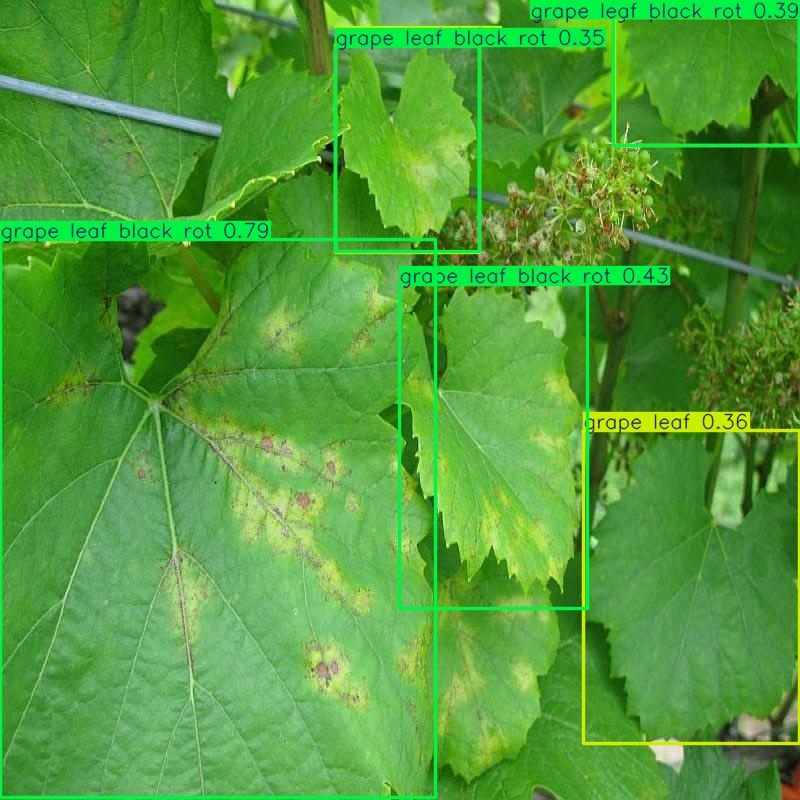

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")